## datathon: Where Data Becomes Reeality

In [73]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Read Dataset
df = pd.read_csv('dataset.csv')

In [75]:
df.head()

,_id,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,1,TAPLEJUNG,8123,4987,5389,4257,9645.0
1,2,SANKHUWASHAVA,15342,13367,6988,10589,17577.0
2,3,SOLUKHUMBU,7819,13501,2948,5493,8441.0
3,4,E.MOUNTAIN,31284,31855,15324,20339,35663.0
4,5,PANCHTHAR,14854,11331,8511,9835,18346.0


In [76]:
df.describe()

,_id,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
count,96.000000,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,95.000000
mean,48.500000,4.275562e+04,5.647433e+04,26825.260417,5.043505e+04,58555.189474
std,27.856777,1.144496e+05,1.508551e+05,71948.998086,1.358044e+05,96696.838132
min,1.000000,4.520000e+02,0.000000e+00,259.000000,0.000000e+00,259.000000
25%,24.750000,8.074750e+03,1.020550e+04,4630.750000,9.085000e+03,14179.500000
50%,48.500000,1.513050e+04,1.954000e+04,8343.500000,1.710250e+04,28027.000000
75%,72.250000,2.600800e+04,3.674975e+04,15694.000000,3.110500e+04,43324.000000
max,96.000000,1.026135e+06,1.355384e+06,643806.000000,1.210441e+06,536299.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     96 non-null     int64  
 1   DISTRICT                96 non-null     object 
 2   MILKING  COWS NO.       96 non-null     int64  
 3   MILKING  BUFFALOES NO.  96 non-null     int64  
 4   COW MILK                96 non-null     int64  
 5   BUFF MILK               96 non-null     int64  
 6   TOTAL MILK PRODUCED     95 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 5.4+ KB


In [78]:
df.isnull().sum()

_id                       0
DISTRICT                  0
MILKING  COWS NO.         0
MILKING  BUFFALOES NO.    0
COW MILK                  0
BUFF MILK                 0
TOTAL MILK PRODUCED       1
dtype: int64

In [79]:
df.tail()

,_id,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
91,92,KAILALI,27758,41103,27905,36677,64582.0
92,93,KANCHANPUR,20164,27812,23146,25876,49022.0
93,94,FW.TERAI,47922,68915,51051,62553,113604.0
94,95,FW. REGION,130595,132257,87936,112438,200374.0
95,96,NEPAL,1026135,1355384,643806,1210441,NaN


In [80]:
df['TOTAL MILK PRODUCED'].loc[95] = ( df['COW MILK'].loc[95]+ df['BUFF MILK'].loc[95])

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_2653/1788358231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL MILK PRODUCED'].loc[95] = ( df['COW MILK'].loc[95]+ df['BUFF MILK'].loc[95])


In [81]:
df.tail()

,_id,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
91,92,KAILALI,27758,41103,27905,36677,64582.0
92,93,KANCHANPUR,20164,27812,23146,25876,49022.0
93,94,FW.TERAI,47922,68915,51051,62553,113604.0
94,95,FW. REGION,130595,132257,87936,112438,200374.0
95,96,NEPAL,1026135,1355384,643806,1210441,1854247.0


In [82]:
200374.0 - 112438

87936.0

In [83]:
df['COW MILK'].fillna(np.mean(df['COW MILK']), inplace=True)

In [84]:
df.isnull().sum()

_id                       0
DISTRICT                  0
MILKING  COWS NO.         0
MILKING  BUFFALOES NO.    0
COW MILK                  0
BUFF MILK                 0
TOTAL MILK PRODUCED       0
dtype: int64

In [85]:
(df['BUFF MILK'][df['BUFF MILK'].isnull() == True])

Series([], Name: BUFF MILK, dtype: int64)

In [93]:
df.sort_values(by=['TOTAL MILK PRODUCED'],ascending=True)

,_id,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
43,44,MANANG,452,0,259,0,259.0
44,45,MUSTANG,1109,49,635,35,670.0
45,46,W.MOUNTAIN,1561,49,894,35,929.0
65,66,HUMLA,1677,496,961,421,1382.0
63,64,DOLPA,2043,713,1100,514,1614.0
...,...,...,...,...,...,...,...
57,58,W.HILLS,94009,225270,64947,230740,295687.0
62,63,W. REGION,154560,341323,105190,315616,420806.0
19,20,E. REGION,332384,292178,196708,263199,459907.0
42,43,C. REGION,263728,377741,177815,358483,536299.0


/Users/bibekchalise/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:808: UserWarning: The label '_id' of <BarContainer object of 10 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot: xlabel='DISTRICT'>

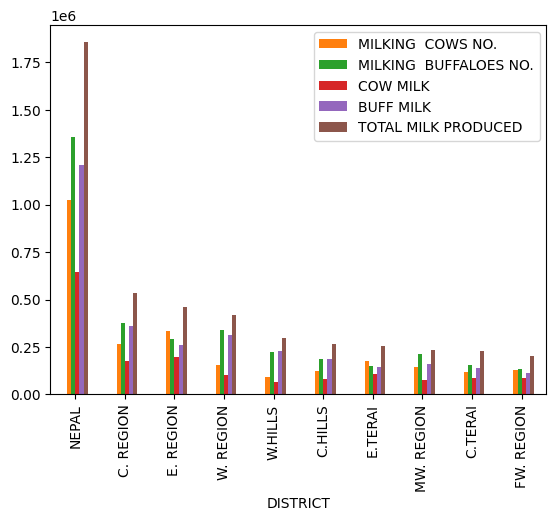

In [87]:
df.nlargest(10, 'TOTAL MILK PRODUCED').plot(kind='bar', x='DISTRICT')

In [88]:
nlrg = df.nlargest(10, 'TOTAL MILK PRODUCED')

In [89]:
nlrg

,_id,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
95,96,NEPAL,1026135,1355384,643806,1210441,1854247.0
42,43,C. REGION,263728,377741,177815,358483,536299.0
19,20,E. REGION,332384,292178,196708,263199,459907.0
62,63,W. REGION,154560,341323,105190,315616,420806.0
57,58,W.HILLS,94009,225270,64947,230740,295687.0
33,34,C.HILLS,125519,187803,78958,187149,266107.0
18,19,E.TERAI,177124,150892,106797,147023,253820.0
81,82,MW. REGION,144868,211885,76157,160705,236862.0
41,42,C.TERAI,116829,157331,85684,141074,226758.0
94,95,FW. REGION,130595,132257,87936,112438,200374.0


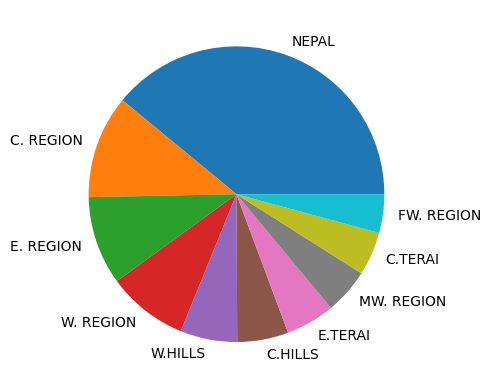

In [91]:
plt.pie( x=nlrg['TOTAL MILK PRODUCED'], labels=nlrg['DISTRICT'])
plt.show()



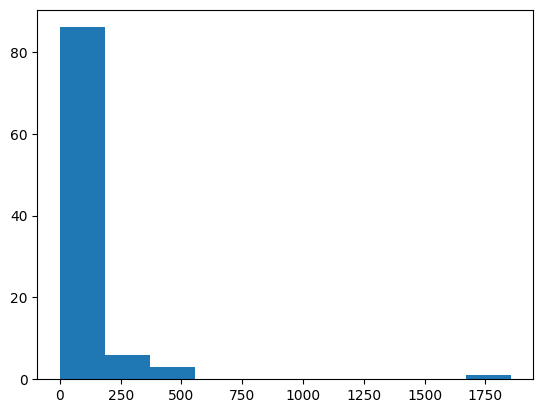

In [103]:
plt.hist(x=df['TOTAL MILK PRODUCED']/1000, bins=10)
plt.show()

In [117]:
tM =  (df.sort_values(by=['TOTAL MILK PRODUCED'],ascending=True)['TOTAL MILK PRODUCED']).reset_index()

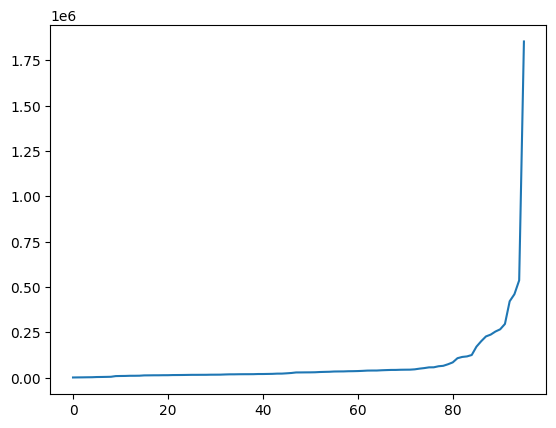

In [120]:
plt.plot(tM.index, tM['TOTAL MILK PRODUCED'])

In [ ]:
MILKING COWS NO.

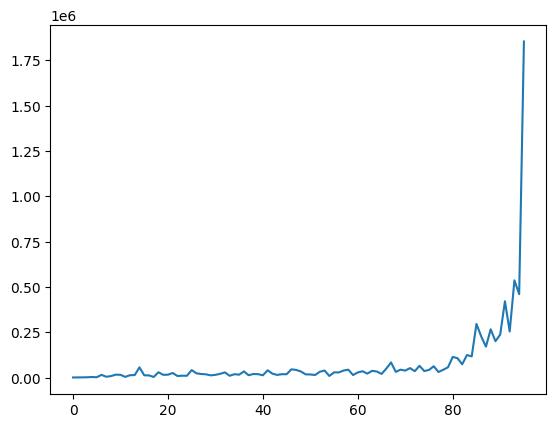

In [125]:
tM =  (df.sort_values(by=['MILKING  COWS NO.'],ascending=True)['TOTAL MILK PRODUCED']).reset_index()
plt.plot(tM.index, tM['TOTAL MILK PRODUCED'])

In [124]:
df.columns

Index(['_id', 'DISTRICT', 'MILKING  COWS NO.', 'MILKING  BUFFALOES NO.',
       'COW MILK', 'BUFF MILK', 'TOTAL MILK PRODUCED'],
      dtype='object')

In [132]:
df['BCNRatio'] = df['MILKING  COWS NO.'] / df['MILKING  BUFFALOES NO.']
df['BCMRatio'] = df['COW MILK'] / df ['BUFF MILK']

In [133]:
df

,_id,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BCNRatio,BCMRatio
0,1,TAPLEJUNG,8123,4987,5389,4257,9645.0,1.628835,1.265915
1,2,SANKHUWASHAVA,15342,13367,6988,10589,17577.0,1.147752,0.659930
2,3,SOLUKHUMBU,7819,13501,2948,5493,8441.0,0.579142,0.536683
3,4,E.MOUNTAIN,31284,31855,15324,20339,35663.0,0.982075,0.753429
4,5,PANCHTHAR,14854,11331,8511,9835,18346.0,1.310917,0.865379
...,...,...,...,...,...,...,...,...,...
91,92,KAILALI,27758,41103,27905,36677,64582.0,0.675328,0.760831
92,93,KANCHANPUR,20164,27812,23146,25876,49022.0,0.725011,0.894497
93,94,FW.TERAI,47922,68915,51051,62553,113604.0,0.695378,0.816124
94,95,FW. REGION,130595,132257,87936,112438,200374.0,0.987434,0.782084


<AxesSubplot: xlabel='DISTRICT'>

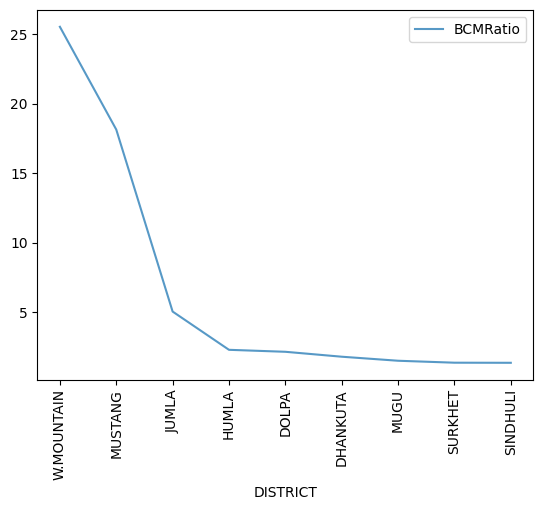

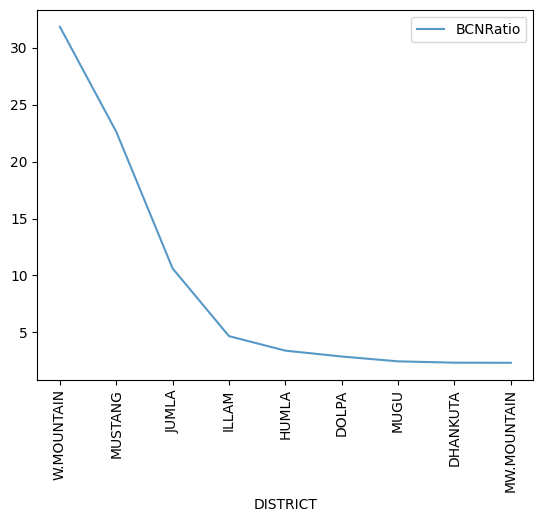

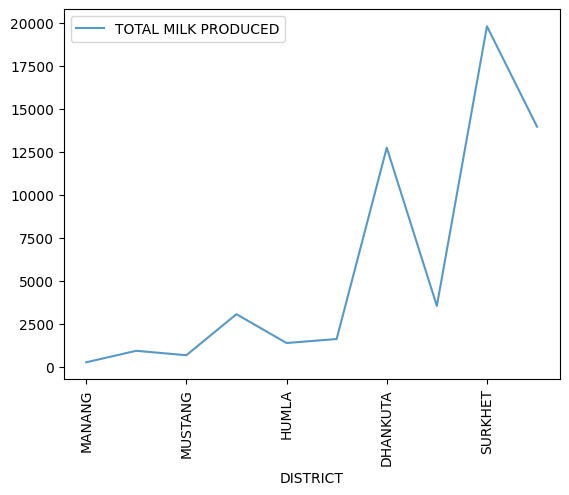

In [151]:
df.sort_values(by=['BCMRatio'], ascending=False).head(10).plot(kind='line', x='DISTRICT', y='BCMRatio',alpha=0.75, rot=90)
df.sort_values(by=['BCNRatio'], ascending=False).head(10).plot(kind='line', x='DISTRICT', y='BCNRatio',alpha=0.75, rot=90)
df.sort_values(by=['BCMRatio'], ascending=False).head(10).plot(kind='line', x='DISTRICT', y='TOTAL MILK PRODUCED',alpha=0.75, rot=90)
